# Lecture 14: árboles de decisión

Las personas normalmente tomamos decisiones a partir de los pros y contras de cada posibilidad. Más allá, hacemos un mapa mental de cómo tomar decisiones a partir de condiciones. Pensemos en el proceso de elegir pareja:

* ¿Qué características son importantes para que nosotros elijamos pareja?
* ¿Es importante que sea o no una persona con altos recursos económicos?
* ¿Es importante que sea lindo/linda o no?
* ¿Debemos tener metas comunes?
* ¿Debe compartir nuestros hobbies?

Pensemos en un ejemplo de una persona interesada:

<center><img src="Imagen DT.png"/></center>

Pensemos también en el hecho simple de elegir trabajo: si me ofrecen un salario mayor a COP$5 millones, digo que sí. Si no, entonces reviso si es contrato por prestación de servicios o contrato laboral. Si me ofrecen un contrato laboral, sí; si no, pienso en si debo ir a trabajar físico o remoto. Y así con varias decisiones. Este es el principio de los árboles de decisión.

# 1. Los árboles de decisión y su estructura
Un **algoritmo de árbol de decisión** es un modelo que siga una estructura de un árbol, comprendiendo una serie de decisiones lógicas que se van dividiendo en nodos de decisión. Las **divisiones de cada nodo** se llaman **ramas** y los **puntos de decisión final** se llaman **nodos de hoja**.

Un nuevo dato a ser evaluado debe pasar por el **nodo raíz**, pasa por todos los **nodos de decisión** y se va clasificando a través de las decisiones lógicas hasta llegar a un **nodo hoja** que lo clasifica (u otorga un valor, en el caso de árboles de regresión). 

Dado este algoritmo, los árboles de decisión se utilizan para:

* **Modelos de puntajes de crédito:** otorga transparencia en las decisiones de acpetación o rechazo de un crédito.
* **Estudios de marketing para identificar la satisfacción de clientes con la campaña:** ayuda a entender el flujo de decisión del cliente.
* **Diagnóstico de condiciones médicas:** explica bien cuáles son las causas, síntomas y otros elementos que llevaron al diagnóstico.

# 2. Divide y vencerás

Los árboles de decisión se centran en la **partición recursiva**. Es decir, se dividen los datos hasta que existan clases similares. Para ello, el algoritmo encuentra una variable que pueda dividir de mejor manera los datos, encontrando más fácilmente la clase a predecir. Esto lo hace varias veces hasta que se cumple un criterio para detenerse.

Miremos este ejemplo: saber si una película será un éxito de la crítica, un éxito mainstream o un fracaso: ¿qué se puede observar?

<center><img src="ej1.png"/></center>

Podríamos aplicar una estrategia de **divide y conquistarás**. Dividamos primero la base de datos por el uso de celebridades de alto nivel:

<center><img src="ej3.png"/></center>

Ahora dividamos por el presupuesto:

<center><img src="ej2.png"/></center>

Es decir, podemos encontrar cómo dividir la base de datos para categorizar bien los datos en sus tres clases. Esto lo podríamos poner en un árbol de decisiones:

<center><img src="ej_tree.png"/></center>

# 3. Predicción de créditos de alto riesgo

## 3.1. Importación de los datos

In [103]:
import pandas as pd

credit = pd.read_csv("https://raw.githubusercontent.com/jagallegod/curso-machine-learning/master/arboles/credit.csv")
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,skilled employee,1,yes,yes,1
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,skilled employee,1,none,yes,2
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,skilled employee,2,none,yes,1
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,skilled employee,2,none,yes,2


> ¿Qué encontramos? ¿Qué variables hay?

Revisemos varios elementos de la base de datos:

In [104]:
# Tamaño de la base de datos
print("="*64)
print("Tenemos un total de {0} observaciones con {1} variables.".format(credit.shape[0], credit.shape[1]))
print("="*64)
print("\n")

# Valores perdidos
print("="*64)
print("Valores perdidos")
print("="*64)
print(credit.isnull().sum())
print("\n")

# Valores únicos
print("="*64)
print("Valores únicos")
print("="*64)
print(credit.nunique())
print("\n")

Tenemos un total de 1000 observaciones con 21 variables.


Valores perdidos
checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
job                     0
dependents              0
telephone               0
foreign_worker          0
default                 0
dtype: int64


Valores únicos
checking_balance          4
months_loan_duration     33
credit_history            5
purpose                  10
amount                  921
savings_balance           5
employment_length         5
installment_rate          4
personal_status           4
other_debtors             3
residence_history         4
property                  4
age         

## 3.2. Exploración de los datos

Revisemos un poco cómo se comportan las variables:

In [105]:
credit.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_length', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_history', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'job',
       'dependents', 'telephone', 'foreign_worker', 'default'],
      dtype='object')

In [106]:
var = "checking_balance"
credit[[var, "purpose"]].groupby(var).count()

,purpose
checking_balance,
1 - 200 DM,269
< 0 DM,274
> 200 DM,63
unknown,394


## 3.3. Preparación de los datos

Separemos los datos entre base de datos de entrenamiento y testeo:

In [107]:
import pandas as pd

from sklearn.model_selection import train_test_split

# Splitting X and y
X = credit.drop(['default'], axis = 1)
y = credit['default']

# Splitting in train, validation and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Size of train dataset: ", X_train.shape[0])
print("Size of test dataset: ", X_test.shape[0])

Size of train dataset:  800
Size of test dataset:  200


## 3.4. Entrenamiento del modelo

Ahora estamos listos para entrenar nuestro modelo. Sin embargo, si quisiéramos hacerlo, vamos a tener un problema: el algoritmo en Python no acepta variables categóricas. Por ello, debemos realizar un proceso de **one-hot encoding**: crear una variable para cada categoría:

In [108]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

# Definimos el modelo
clf = DecisionTreeClassifier()

# Creamos las dummies
vars_to_dummies = ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_length', 'personal_status',\
                   'other_debtors', 'property', 'installment_plan', 'housing', 'job', 'telephone', 'foreign_worker']
X_train_ohe = pd.get_dummies(X_train[vars_to_dummies],drop_first=True)

# Entrenamos el modelo
clf.fit(X_train_ohe, y_train)

DecisionTreeClassifier()

Podemos hacer una representación gráfica:

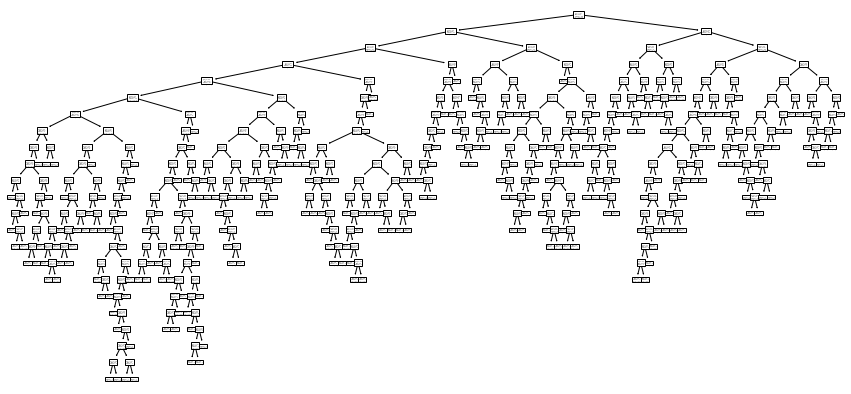

In [109]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 7))
tree.plot_tree(clf)
plt.show()

Evaluemos el modelo sin mejorarle nada. 

> ¡Recuerden que esto no se puede hacer sino hasta estar seguros de nuestros modelos! En este caso lo hacemos en un contexto pedagógico, con el objetivo de mostrar el cambio en el rendimiento

In [110]:
import pandas as pd

from sklearn.metrics import accuracy_score

# One-hot encoding de la base de datos de testeo
vars_to_dummies = ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_length', 'personal_status',\
                   'other_debtors', 'property', 'installment_plan', 'housing', 'job', 'telephone', 'foreign_worker']
X_test_ohe = pd.get_dummies(X_test[vars_to_dummies],drop_first=True)

# Predicción
y_pred = clf.predict(X_test_ohe)

print("="*64)
print("El rendimiento del modelo es: ", round(accuracy_score(y_test, y_pred), 3))
print("="*64)

El rendimiento del modelo es:  0.67


# 5. Perfeccionamiento del modelo

## 5.1. Validación por Hold-On

El modelo anterior fue un intento rápido. Sin embargo, podemos siempre mejorar. ¡Intentémoslo!

Una manera de mejorar el modelo es por el método que hemos conocido: separación de la base de datos en un dataset de entrenamiento y uno de validación. En la base de datos de entrenamiento vamos a ajustar el modelo y evaluamos el desempeño en la base de datos de validación. Este método se llama **Hold-On**. Es un enfoque común que no requiere mucha capacidad de procesamiento y que se puede hacer rápidamente. Ya habíamos hecho la separación anterior, ya que era nuestro acercamiento común. En ese sentido, vamos a aplicar el método de validación:

> ¡Nota! No se puede tocar la base de datos de testeo, sino hasta la evaluación final.



In [111]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Splitting X and y
X = credit.drop(['default'], axis = 1)
y = credit['default']

# Splitting in train, validation and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

print("Size of train dataset: ", X_train.shape[0])
print("Size of validation dataset: ", X_val.shape[0])
print("Size of test dataset: ", X_test.shape[0])

# Definiremos los parámetros a revisar
params ={
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

# Creamos las dummies
vars_to_dummies = ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_length', 'personal_status',\
                   'other_debtors', 'property', 'installment_plan', 'housing', 'job', 'telephone', 'foreign_worker']
X_train_ohe = pd.get_dummies(X_train[vars_to_dummies],drop_first=True)

# One-hot encoding de la base de datos de validación
vars_to_dummies = ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_length', 'personal_status',\
                   'other_debtors', 'property', 'installment_plan', 'housing', 'job', 'telephone', 'foreign_worker']
X_val_ohe = pd.get_dummies(X_val[vars_to_dummies],drop_first=True)



res = pd.DataFrame(columns = ['criterion', 'max_depth', 'max_features', 'splitter', 'accuracy'])

for criterion in params['criterion']:
    for max_depth in params['max_depth']:
        for max_features in params['max_features']:
            for splitter in params['splitter']:

                # Entrenamiento
                clf = DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, max_features = max_features, splitter = splitter)\
                            .fit(X_val_ohe, y_val)

                # Predicción
                y_pred = clf.predict(X_test_ohe)

                res = res.append({'criterion': criterion, 'max_depth': max_depth, 'max_features': max_features, \
                    'splitter': splitter, 'accuracy': accuracy_score(y_test, y_pred)}, ignore_index = True)


Size of train dataset:  640
Size of validation dataset:  160
Size of test dataset:  200


C:\Users\juanm\AppData\Local\Temp\ipykernel_6192\269720442.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'criterion': criterion, 'max_depth': max_depth, 'max_features': max_features, \
C:\Users\juanm\AppData\Local\Temp\ipykernel_6192\269720442.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'criterion': criterion, 'max_depth': max_depth, 'max_features': max_features, \
C:\Users\juanm\AppData\Local\Temp\ipykernel_6192\269720442.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'criterion': criterion, 'max_depth': max_depth, 'max_features': max_features, \
C:\Users\juanm\AppData\Local\Temp\ipykernel_6192\269720442.py:52: FutureWarning: The frame.append metho

Revisemos la base de datos de resultados: ¿cuál es el modelo que mejor resultados tiene? ¿Cuáles son los parámetros de ese modelo?

In [112]:
res = res.sort_values('accuracy', ascending = False)
res

,criterion,max_depth,max_features,splitter,accuracy
189,entropy,4,0.2,random,0.760
171,entropy,2,sqrt,random,0.750
207,entropy,6,0.6,random,0.745
49,gini,6,0.2,random,0.745
32,gini,4,log2,best,0.745
...,...,...,...,...,...
88,gini,12,log2,best,0.585
8,gini,None,0.4,best,0.585
273,entropy,16,0.2,random,0.580
205,entropy,6,0.4,random,0.575


In [113]:
res = res.sort_values('accuracy', ascending = False).reset_index(drop = True)
print("Los parámetros que otorgan el mejor modelo es el siguiente:")
print(res.iloc[0])

Los parámetros que otorgan el mejor modelo es el siguiente:
criterion       entropy
max_depth             4
max_features        0.2
splitter         random
accuracy           0.76
Name: 0, dtype: object


Ahora sí, evaluemos cómo nos fue con este proceso de validación:

In [114]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Creamos las dummies
vars_to_dummies = ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_length', 'personal_status',\
                   'other_debtors', 'property', 'installment_plan', 'housing', 'job', 'telephone', 'foreign_worker']
X_train_ohe = pd.get_dummies(X_train[vars_to_dummies],drop_first=True)

# One-hot encoding de la base de datos de testeo
vars_to_dummies = ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_length', 'personal_status',\
                   'other_debtors', 'property', 'installment_plan', 'housing', 'job', 'telephone', 'foreign_worker']
X_test_ohe = pd.get_dummies(X_test[vars_to_dummies],drop_first=True)


# Definimos el modelo
clf = DecisionTreeClassifier(criterion = res.iloc[0]['criterion'], max_depth = res.iloc[0]['max_depth'],\
     max_features = res.iloc[0]['max_features'], splitter = res.iloc[0]['splitter']).fit(X_train_ohe, y_train)


# Predicción
y_pred = clf.predict(X_test_ohe)

print("="*64)
print("El rendimiento del modelo es: ", round(accuracy_score(y_test, y_pred), 3))
print("="*64)

El rendimiento del modelo es:  0.71


## 5.2. Validación Cruzada (Cross-Validation)

Como sabemos, en ocasiones no poseemos con todos los datos que deseamos, sino que tenemos relativamente pocos datos. En ese sentido, el método Hold-On termina siendo contraproducente, ya que dividir los datos en entrenamiento, validación y testeo resulta bastante exigente. En ocasiones, si tenemos alrededor de 200 datos, podríamos quedarnos con 32 datos de validación si dividimos en 80% la base de datos de entrenamiento y testeo y 80% la de entrenamiento y validación. ¡Estos son muy pocos datos!

Para ello, hay otros dos métodos que pueden utilizarse: la validación cruzada por k particiones (K-Folds Cross Validation - KFoldsCV) y la validación cruzada dejando uno por fuera (Left-Only One Cross-Validation - LOOCV). Hoy nos concentraremos en el KFoldsCV.

La idea de la validación cruzada por particiones es simple: dividir la base de datos de entrenamiento en K partes (a eso hace referencia la K), entrenar con K-1 partes y validar el rendimiento con la última; tomar otro arreglo de K-1 partes, entrenar y validar con la que queda; y así hasta dar todo el ciclo. Para cada uno de ellos se calcula el valor de métrica que se haya estipulado (por ejemplo, precisión) y se calcula el promedio entre ellos.

<center><img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png"/></center>

Resulta menos demandante para los datos, ya que no necesita dejar una parte de los datos sin tocar (la de validación), sino que se ajusta el modelo con todos los datos disponibles en la base de datos de entrenamiento. Evidentemente es un poco más exigente en términos computacionales, pero no lo es tanto como LOOCV.

> **Nota:** aún se necesita de dejar una base de datos de testeo que **no se toca sino hasta la evaluación final**.

### 5.2.1. Optimización paramétrica

La idea de este tipo de validaciones es mejorar el desempeño del modelo probando diferentes arreglos. Esto se llama **optimización paramétrica**. En el caso de validación cruzada por K particiones tenemos tres tipos:

* **Optimización manual:** realizar la optimización de manera manual (algo un poco más rústico al anterior código, pero con un ajuste de validación cruzada). Es la más demandante en tiempo humano de las tres.
* **Optimización por grilla de parámetros:** realizar optimización con una grilla de parámetros (algo como el anterior código, pero con un ajuste de validación cruzada). Es la más demandante en poder de cómputo de las tres.
* **Optimización por grilla aleatoria:** realizar optimización con una grilla de parámetros que trata valores entre los rangos elegidos de manera aleatoria. Se encuentra en el punto medio de las dos anteriores.

Veamos cómo aplicar el último método:

In [115]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Splitting X and y
X = credit.drop(['default'], axis = 1)
y = credit['default']

# Splitting in train, validation and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Size of train dataset: ", X_train.shape[0])
print("Size of test dataset: ", X_test.shape[0])

# Definiremos los parámetros a revisar
params ={
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 50, 2),
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

clf = DecisionTreeClassifier()

# Creamos las dummies
vars_to_dummies = ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_length', 'personal_status',\
                   'other_debtors', 'property', 'installment_plan', 'housing', 'job', 'telephone', 'foreign_worker']
X_train_ohe = pd.get_dummies(X_train[vars_to_dummies],drop_first=True)

# One-hot encoding de la base de datos de validación
vars_to_dummies = ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_length', 'personal_status',\
                   'other_debtors', 'property', 'installment_plan', 'housing', 'job', 'telephone', 'foreign_worker']
X_test_ohe = pd.get_dummies(X_test[vars_to_dummies],drop_first=True)


# Cross_Validation
clf_est = RandomizedSearchCV(clf, params , n_iter=10, cv=3, scoring='accuracy').fit(X_train_ohe, y_train)

print(clf_est.best_estimator_)
print(clf_est.best_params_)

# Prediction
y_pred = clf_est.predict(X_test_ohe)

print("="*64)
print("El rendimiento del modelo es: ", round(accuracy_score(y_test, y_pred), 3))
print("="*64)


Size of train dataset:  800
Size of test dataset:  200
DecisionTreeClassifier(max_depth=8, max_features=0.4, splitter='random')
{'splitter': 'random', 'max_features': 0.4, 'max_depth': 8, 'criterion': 'gini'}
El rendimiento del modelo es:  0.72
